## 1. Logistic Regression

In [3]:
import pandas as pd
data=pd.read_csv("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex2/ex2data1.txt",header=None)
data.columns = ['Exam 1 score', 'Exam 2 score',"Admission Status"] 
data.head()

,Exam 1 score,Exam 2 score,Admission Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.1 Visualizing the Data

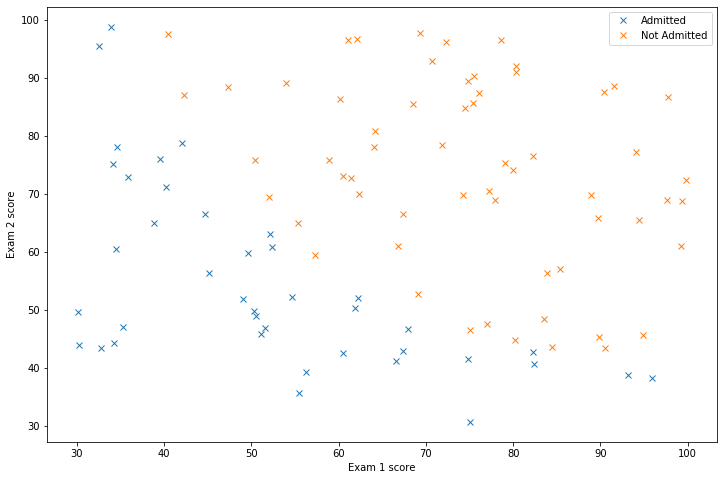

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

groups= data.groupby("Admission Status")
fig, ax = plt.subplots(figsize=(12,8))
for name, group in groups:
    ax.plot(group["Exam 1 score"], group["Exam 2 score"], marker="x", linestyle="")
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
categories = data["Admission Status"].apply(lambda z: 'Admitted' if z == 0 else 'Not Admitted')
ax.legend(categories.unique())

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

In [61]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))   

Provide input values to the sigmoid function below and run to check your implementation



In [5]:
sigmoid(0)

0.5

#### 1.2.2 Cost function and gradient

In [6]:
X = data.loc[:,['Exam 1 score','Exam 2 score']] #Access to features
X.insert(0,"1",1) #Add intercept therm to X
y = data.loc[:,["Admission Status"]]#Access to target variable
X = np.matrix(X)#From data frame to numpy matrix
y = np.matrix(y)#From data frame to numpy matrix
theta = np.zeros(3)

In [7]:
def cost(theta, X, y):#si sirve
    m = np.size(y,0)
    theta = np.matrix(theta)
    sig = sigmoid(X * theta.T)
    j = 1/m * np.sum(np.multiply(-y,np.log(sig))-np.multiply((1-y),np.log(1-sig)))
    return j

In [8]:
cost1 = cost(theta, X, y)
print('Cost at initial theta (zeros): \n', cost1)

Cost at initial theta (zeros): 
 0.6931471805599453


In [9]:
def gradient(theta,X,y):
    theta = np.matrix(theta)
    m = np.size(y,0)
    sig = sigmoid(X * theta.T)
    grad = np.multiply(1/m,X.transpose()*(sig-y)) 
    return grad

In [15]:
gradient1 = gradient(theta, X, y)
print("Gradient at initial theta (zeros):\n",gradient1)

Gradient at initial theta (zeros):
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


Note that instead of having one cost function as in the Matlab code, here we need separete functions for gradient and cost to use the Scipy's "optimize" that does the same thing as Matlab "fminunc".
Scipy's "optimize" seeks better values for theta.

In [12]:
import scipy.optimize as opt
new_theta = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
new_theta

(array([-25.16131869,   0.20623159,   0.20147149]), 36, 0)

In [19]:
cost_new_theta = cost(new_theta[0], X, y)
print('Cost at theta found by fminunc:\n',cost_new_theta)

Cost at theta found by fminunc:
 0.2034977015894743


 #### 1.2.3 Evaluating logistic regression

The predict function will produce '1' or '0' predictions given a dataset and a learned parameter vector. This function also helps compute accuracy on our training data set.

In [141]:
def predict(theta,X):
    p = np.zeros(np.size(X,0))
    for i in range(len(X)):
        if sigmoid(X[i]*theta.T)>= 0.5:
            p[i]=1
        else:
            p[i]=0
    return(p)

Predict probability for a student with score 45 on exam 1  and score 85 on exam 2 

In [44]:
nt = np.matrix(new_theta[0])
prob = sigmoid([1,45,85] * nt.T)
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0,0] )

For a student with scores 45 and 85, we predict an admission probability of 0.7762906242704579


Compute the accuracy of our data set.

In [121]:
import statistics
nt = np.matrix(new_theta[0])
p = predict(nt,X)
accu=[]

for i in range(len(p)):
    if y[i,0] == p[i]:
        accu.append(1)
    else:
        accu.append(0)

x = int(statistics.mean(accu)*100)
print('Train Accuracy:{0}%'.format(x))


Train Accuracy:89%


Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time.  :)

## 2. Regularized logistic regression

In this part of the exercise, it was implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. 

#### 2.1 Visualizing the data

In [18]:
data2 = data=pd.read_csv("/Users/natalychacon/Documents/Machine Learning/std coursera/machine-learning-ex/ex2/ex2data2.txt",header=None)
data2.columns = ['Microship Test 1', 'Microship Test 2',"Results"] 
data2.head()

,Microship Test 1,Microship Test 2,Results
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


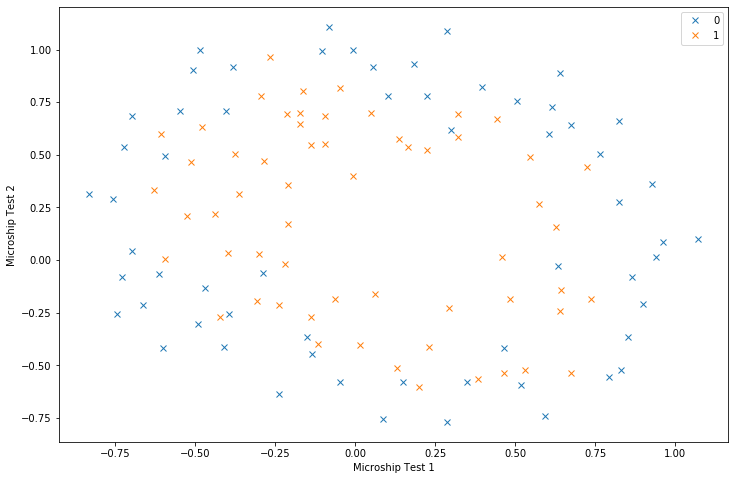

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

groups= data2.groupby("Results")
fig, ax = plt.subplots(figsize=(12,8))
for name, group in groups:
    ax.plot(group["Microship Test 1"], group["Microship Test 2"], marker="x", linestyle="",label= name)
ax.set_xlabel("Microship Test 1")
ax.set_ylabel("Microship Test 2")
ax.legend()

As is not a linear decision boundary one way to fit the data better is to create more features from each data point, that are derived from polynomials of the original features.

In [20]:
degree = 5
x1 = data2["Microship Test 1"]
x2 = data2["Microship Test 2"]

data2.insert(3, 'Ones', 1)
for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop("Microship Test 1", axis=1, inplace=True)
data2.drop("Microship Test 2", axis=1, inplace=True)

data2.head()

,Results,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


#### 2.3 Cost function and gradient

Now we need to modify the cost and gradient functions from part 1 to include the regularization term. Note that you should not regularize the theta(0) parameter

In [42]:
X2 = data2.iloc[:,1:np.size(data2,1)]#Access to features
y2 = data.loc[:,["Results"]]#Access to target variable
X2 = np.matrix(X2)#From data frame to numpy matrix
y2 = np.matrix(y2)#From data frame to numpy matrix
initial_theta = np.zeros(np.size(X2,1))
learning_rate = 1 #lambda

In [83]:
def costFunctionReg(theta, X, y, learning_rate):
    m = np.size(y,0)
    theta = np.matrix(theta)
    sig = sigmoid(X * theta.T)
    j = 1/m * np.sum(np.multiply(-y,np.log(sig))-np.multiply((1-y),np.log(1-sig))) + (((learning_rate)/(2*m))*np.sum(np.power(initial_theta[i:np.size(initial_theta)],2)))
    return j

In [85]:
cost2=costFunctionReg(initial_theta, X2, y2, learning_rate)
print('Cost at initial theta (zeros):\n', cost2);

Cost at initial theta (zeros):
 0.6931471805599454


In [131]:
def gradientReg(theta,X,y,learning_rate):
    theta = np.matrix(theta)
    m = np.size(y,0)
    sig = sigmoid(X * theta.T)
    grad1 = 1/m * (X.T*(sig-y)) 
    grad2 = learning_rate/m * np.power(theta,2)
    grad2[0,0]=0
    return grad1.T+grad2

In [132]:
gradientReg(initial_theta,X2,y2,learning_rate)

matrix([[0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
         0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
         0.00309594]])

In [138]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=gradientReg, args=(X2, y2, learning_rate))
result

(array([ 0.95693149,  0.77829086, -3.44260859, -2.05735766,  1.00410602,
        -0.34518113, -1.73376852, -2.51273792,  0.11744237, -2.94756349,
        -0.17632232]), 107, 4)